In [9]:
# import zipfile

# # Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()


In [10]:
import os

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


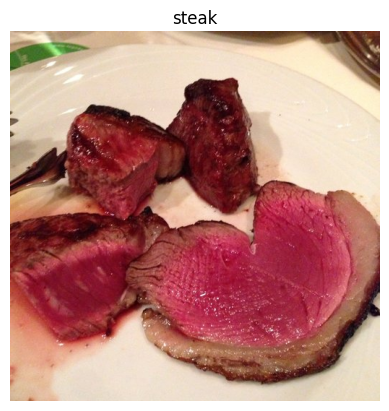

In [12]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"), # activation='relu' == Activations(tf.nn.relu)
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

2024-03-18 14:36:11.845425: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 14:36:12.113614: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 14:36:12.113743: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 14:36:12.160572: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-18 14:36:12.269686: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 14:36:12.271591: I tensorflow/core/platform/cpu_feature_guard.cc:1

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 37s 778ms/step - loss: 0.6316 - accuracy: 0.6373 - val_loss: 0.5038 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 36s 766ms/step - loss: 0.4632 - accuracy: 0.7800 - val_loss: 0.3778 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 40s 858ms/step - loss: 0.4211 - accuracy: 0.8040 - val_loss: 0.3274 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 40s 842ms/step - loss: 0.3804 - accuracy: 0.8333 - val_loss: 0.3365 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 39s 839ms/step - loss: 0.3445 - accuracy: 0.8553 - val_loss: 0.3241 - val_accuracy: 0.8620


In [25]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_15 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_17 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

In [26]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img


In [27]:
pizza = load_and_prep_image("pizza_steak/test/pizza/80750.jpg")

# Add an extra axis
print(f"Shape before new dimension: {pizza.shape}")
pizza = tf.expand_dims(pizza, axis=0) # add an extra dimension at axis 0
#pizza = pizza[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {pizza.shape}")
pizza


Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.22565463, 0.15620436, 0.09485106],
         [0.23771633, 0.16320653, 0.10438301],
         [0.24700506, 0.16669355, 0.11540616],
         ...,
         [0.10002694, 0.10201467, 0.12742403],
         [0.10263785, 0.10655942, 0.12616725],
         [0.08626562, 0.09018718, 0.10587346]],

        [[0.2374706 , 0.15460996, 0.08819716],
         [0.24725015, 0.1607218 , 0.10578357],
         [0.26781526, 0.17661566, 0.12344876],
         ...,
         [0.0949579 , 0.0949579 , 0.12643923],
         [0.09019608, 0.09388193, 0.11419692],
         [0.09411765, 0.09803922, 0.11764706]],

        [[0.2426902 , 0.14338173, 0.07759916],
         [0.26057047, 0.161262  , 0.10276236],
         [0.25816637, 0.15679835, 0.10137992],
         ...,
         [0.09669372, 0.09669372, 0.13452007],
         [0.09605401, 0.09611717, 0.12730023],
         [0.09303273, 0.09391683, 0.12263707]],

        ...,

        [[0.03560989, 0.02321364, 

In [28]:
model_1.predict(pizza)

1/1 [==============================] - 0s 59ms/step


array([[0.09062434]], dtype=float32)

In [15]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.0,
											 rotation_range=0.2,
											 width_shift_range=0.2,
											 height_shift_range=0.2,
											 zoom_range=0.2,
											 horizontal_flip=True)


valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
																	target_size=(224,224),
																	class_mode="categorical"
																	)



Found 500 images belonging to 2 classes.


Found 1500 images belonging to 2 classes.


In [16]:
model_2 = tf.keras.models.clone_model(model_1)

model_2.compile(loss="categorical_crossentropy",
				optimizer=tf.keras.optimizers.Adam(),
				metrics=["accuracy"]
				)

history_2 = model_2.fit(train_data_augmented,
						epochs=5,
						steps_per_epoch=len(train_data_augmented),
						validation_data=valid_data,
						validation_steps=len(valid_data))

Epoch 1/5


2024-03-18 14:49:04.835809: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at resource_variable_ops.cc:619 : INVALID_ARGUMENT: Cannot update variable with shape [1] using a Tensor with shape [2], shapes must be equal.
2024-03-18 14:49:04.835842: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at resource_variable_ops.cc:619 : INVALID_ARGUMENT: Cannot update variable with shape [1] using a Tensor with shape [2], shapes must be equal.
2024-03-18 14:49:04.836860: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at resource_variable_ops.cc:619 : INVALID_ARGUMENT: Cannot update variable with shape [28090,1] using a Tensor with shape [28090,2], shapes must be equal.
2024-03-18 14:49:04.836935: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at resource_variable_ops.cc:619 : INVALID_ARGUMENT: Cannot update variable with shape [28090,1] using a Tensor with shape [28090,2], shapes must be equal.


InvalidArgumentError: Graph execution error:

Detected at node gradient_tape/sequential/dense/MatMul/MatMul defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 542, in dispatch_queue

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 531, in process_one

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 775, in execute_request

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipykernel_345/2288394858.py", line 8, in <module>

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 543, in minimize

  File "/home/apf2000/Documents/TensorFlow/.venv/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 276, in compute_gradients

Matrix size-incompatible: In[0]: [32,2], In[1]: [28090,1]
	 [[{{node gradient_tape/sequential/dense/MatMul/MatMul}}]] [Op:__inference_train_function_8434]